# Prediction of child's weight using regression

Use regression analysis to find out how well you can predict a child’s weight if you know that child’s height. For this you should use the dataset in the file **fitness_club.csv**.

We perform the regression analysis using both the provided code in the notebook and the `sklearn` library.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
%matplotlib inline

**Upload the fitness_club.csv**

In [2]:
uploaded = files.upload()

Saving fitness_club.csv to fitness_club (1).csv


In [3]:
df = pd.read_csv(io.StringIO(uploaded['fitness_club.csv'].decode('utf-8')))
df.head()

,No.,Sex,Age (years),Height (cm),weight (kg)
0,6,F,12,145,59
1,20,F,12,151,49
2,26,F,12,118,32
3,7,F,13,166,59
4,10,F,13,160,39


In [0]:
X = df[['Height (cm)']].astype('float').values
y = df[['weight (kg)']].astype('float').values

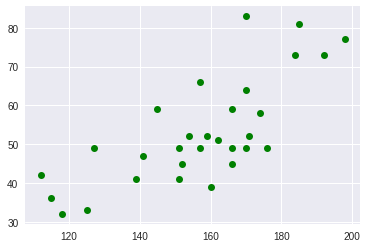

In [5]:
plt.plot(X,y, 'o', color='g', label='UnScaled Data')
plt.show()

In [0]:
X_std = (X-np.mean(X))/np.std(X)
y_std = ((y-np.mean(y))/np.std(y)).flatten()

We use a slightly modified version of the original code, namely, we increase the number of iterations and add an additional stopping criterion.

In [7]:
alpha = 0.001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 1000

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)
    
    try:
        if abs(cost_[-1]-cost_[-2]) < 1e-7:
            print("Breaking at iteration %d" % i)
            break
    except IndexError:
        pass

Breaking at iteration 254


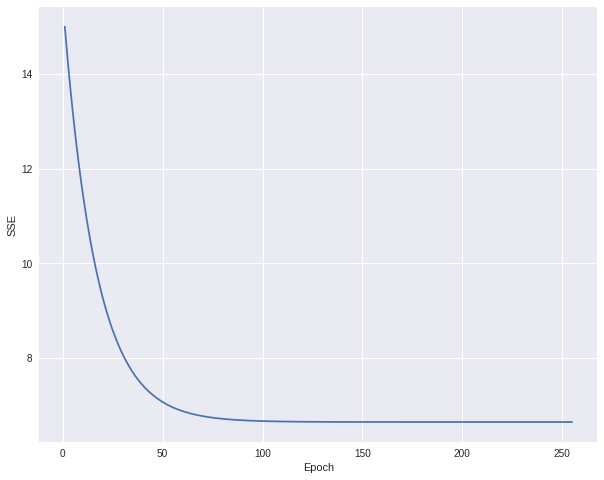

In [8]:
plt.figure(figsize=(10,8))
plt.plot(range(1, len(cost_)+1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [9]:
w_

array([-3.55271368e-17,  7.45706639e-01])

In [0]:
def plot_model(x,y,a0,a1) :
    fig, ax = plt.subplots()
    ax.plot(x,y, 'o', color='g', label='training data')
    ax.plot(x, a0 + a1*x, label='h(x) = %.2f + %.2f * x' %(a0,a1)  )
    plt.legend();

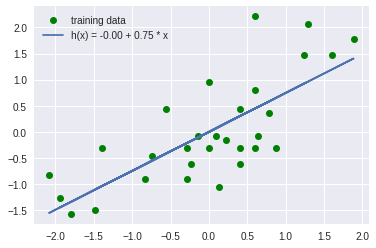

In [11]:
plot_model(X_std, y_std, w_[0], w_[1])

Now let's see what results we get using `sklearn`

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [13]:
from sklearn.linear_model import LinearRegression as LR

reg = LR().fit(X_std, y_std)
reg.coef_, reg.intercept_

(array([[0.74602253]]), array([-4.14693005e-17]))

We note that the results between `sklearn` and the notebook code seems to agree.

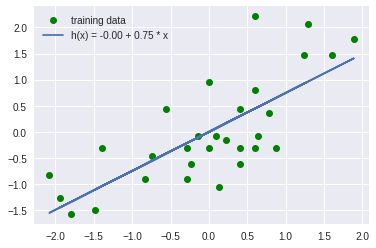

In [14]:
plot_model(X_std, y_std, reg.intercept_, reg.coef_)

In [15]:
reg.score(X_std, y_std)

0.5565496224028941

Not a great $R^2$

In [16]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_std, reg.coef_*X_std+ reg.intercept_)

0.4434503775971059

We plot the Residuals vs the predicted values.

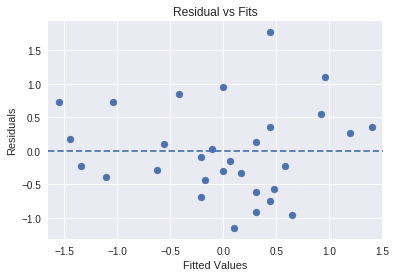

In [17]:
y_pred = reg.predict(X_std)
y_res =  y_std - y_pred

fig, ax = plt.subplots()
ax.set_xlim(min(y_pred)-.1, max(y_pred)+.1)
ax.set_title("Residual vs Fits")
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.scatter(y_pred, y_res)
ax.plot(np.linspace(min(y_pred)-.1, max(y_pred)+.1, 50), [0]*50, '--')
plt.show()

We don't find any obvious pattern in the plot, which is a good thing, considering the alternative would indicate something missing from our model for example a higher order term.

Know, we check the distribution of our residuals.

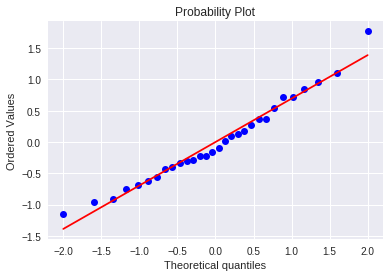

In [18]:
import scipy.stats as stats
measurements = y_res.flatten()
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

They seem to follow a normal distribution, there maybe a problem at the tails though.
In the end we can conclude that we can predict the child's weight from its height fairly accurately.